In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [3]:
xs = np.array([1.0,1.5,2.0,2.5,3.0,3.5],dtype=float)
ys = np.array([10,15,20,25,30,35],dtype=float)


In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])
model.compile(loss='mean_squared_error',optimizer='sgd')

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if(logs.get('loss')) < 0.01:
            print("Reached Loss less than 0.01 so cancelling training!")
            self.model.stop_training=True

In [11]:
callbacks = MyCallback()

In [12]:
history = model.fit(xs,ys,epochs = 800, verbose = 2,callbacks= [callbacks])

Epoch 1/800
1/1 - 0s - loss: 735.5565
Epoch 2/800
1/1 - 0s - loss: 552.5400
Epoch 3/800
1/1 - 0s - loss: 415.1729
Epoch 4/800
1/1 - 0s - loss: 312.0687
Epoch 5/800
1/1 - 0s - loss: 234.6807
Epoch 6/800
1/1 - 0s - loss: 176.5944
Epoch 7/800
1/1 - 0s - loss: 132.9951
Epoch 8/800
1/1 - 0s - loss: 100.2693
Epoch 9/800
1/1 - 0s - loss: 75.7046
Epoch 10/800
1/1 - 0s - loss: 57.2654
Epoch 11/800
1/1 - 0s - loss: 43.4237
Epoch 12/800
1/1 - 0s - loss: 33.0327
Epoch 13/800
1/1 - 0s - loss: 25.2317
Epoch 14/800
1/1 - 0s - loss: 19.3747
Epoch 15/800
1/1 - 0s - loss: 14.9768
Epoch 16/800
1/1 - 0s - loss: 11.6740
Epoch 17/800
1/1 - 0s - loss: 9.1931
Epoch 18/800
1/1 - 0s - loss: 7.3292
Epoch 19/800
1/1 - 0s - loss: 5.9283
Epoch 20/800
1/1 - 0s - loss: 4.8751
Epoch 21/800
1/1 - 0s - loss: 4.0826
Epoch 22/800
1/1 - 0s - loss: 3.4860
Epoch 23/800
1/1 - 0s - loss: 3.0364
Epoch 24/800
1/1 - 0s - loss: 2.6971
Epoch 25/800
1/1 - 0s - loss: 2.4406
Epoch 26/800
1/1 - 0s - loss: 2.2463
Epoch 27/800
1/1 - 0s -

In [13]:
model.predict([5.0])

array([[49.341778]], dtype=float32)

In [15]:
import matplotlib.pyplot as plt

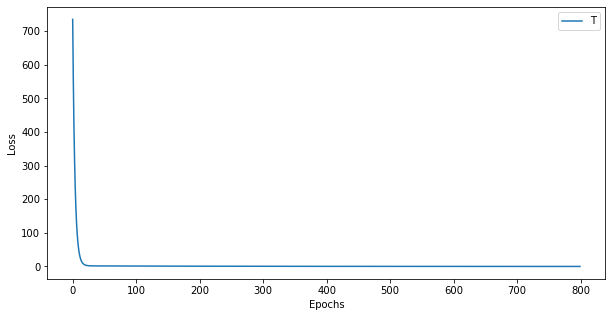

In [30]:
epoch = [int(i) for i in range(len(history.history['loss']))]
loss = history.history['loss']
plt.figure(figsize=(10,5))
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend("Training Loss")